In [13]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [14]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [34]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = dt.date(2017, 6, 30) - dt.timedelta(days=30)

In [35]:
#  3. Convert the June temperatures to a list.
jun_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june).all()

In [36]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(jun_results, columns=['date','precipitation'])

In [40]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.jun_
jun_df.describe()

,precipitation
count,433.000000
mean,0.114988
std,0.287683
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


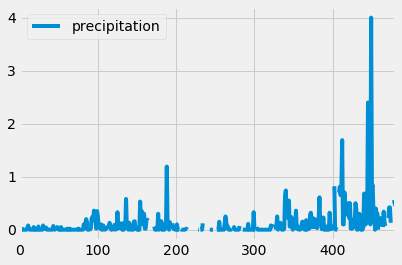

In [38]:
jun_df.plot()

## D2: Determine the Summary Statistics for December

In [7]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = dt.date(2016, 12, 31) - dt.timedelta(days=31)

In [12]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= december).all()

In [9]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date','precipitation'])

In [10]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,precipitation
count,1451.000000
mean,0.170090
std,0.441237
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


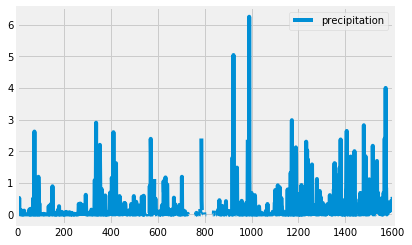

In [11]:
dec_df.plot()